## ILDEBRANDO MAGNANI

Homework #10

im975

In [294]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [242]:
theta = 2.5
delta = 0.7
rho = 0.4
tol = 0.000001

In [243]:
def implicit_h(x, n, rho):
    return (1 / (x + rho * n)) + (1 / (x + (n / rho))) - 2 

In [244]:
def root_finder(function, low_b, upp_b, n, rho):
    return opt.brentq(function, low_b, upp_b, args = (n, rho))

In [245]:
def system_motion(n1, n2, delta, theta, rho):
    s = 0.5
    h1 = root_finder(implicit_h, 0, 1, n1, rho)
    h2 = root_finder(implicit_h, 0, 1, n2, rho)
    
    if n1 <= s and n1 <= s:
        n1_new = delta * ((theta / 2) + (1 - theta) * n1)
        n2_new = delta * ((theta / 2) + (1 - theta) * n2)
        return n1_new, n2_new
    
    elif n1 >= h2 and n2 >= h1:
        n1_new = delta * n1
        n2_new = delta * n2
        return n1_new, n2_new
        
    elif n1 >= s and n2 <= h1:
        n1_new = delta * n1
        n2_new = delta * (theta * h1 + (1 - theta) * n2)
        return n1_new, n2_new
    
    elif n1 <= h2 and n2 >= s:
        n1_new = delta * (theta * h2 + (1 - theta) * n1)
        n2_new = delta * n2
        return n1_new, n2_new

In [267]:
def sample_generator(init_n1, init_n2, size, delta, theta, rho):
    t_list = []
    n1_obs = np.zeros((size))
    n2_obs = np.zeros((size))
    n1_obs[0] = init_n1
    n2_obs[0] = init_n2
    
    for t in range(size-1):
        n1_obs[t+1], n2_obs[t+1] = system_motion(n1_obs[t], n2_obs[t], delta, theta, rho)      
        if t > 2:
            if np.abs(n1_obs[t+1] - n2_obs[t+1]) < tol and np.abs(n1_obs[t] - n2_obs[t]) < tol and \
            np.abs(n1_obs[t-1] - n2_obs[t-1]) < tol and np.abs(n1_obs[t-2] - n2_obs[t-2]) < tol:
                sync = 1
                t_list.append(t-2)
            else:
                sync = 0
    t_sync = min(t_list)
    t_list = []
    return n1_obs, n2_obs, sync, t_sync

t_sync: 78


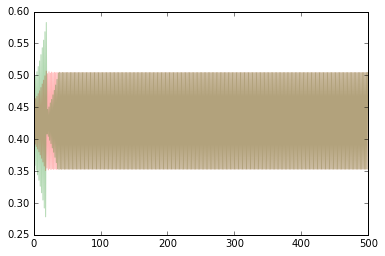

In [306]:
n1_obs, n2_obs, sync, t_sync = sample_generator(0.3, 0.4, 500, delta, theta, rho)
print("t_sync:", t_sync)
plt.plot(n1_obs, 'r', alpha=0.3)
plt.plot(n2_obs, 'g', alpha=0.3)
plt.show()